# Analisis Técnico

## Oscilador Estocástico 

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

C:\Users\rodoh\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
enddate = date.datetime(2020,4,29)
startdate = date.datetime(2019,4,1)
tick = '^MXX'
ipc = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
ipc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,43838.191406,43302.449219,43302.449219,43672.058594,130210300,43672.058594
2019-04-02,43672.058594,43168.058594,43672.058594,43324.589844,115672300,43324.589844
2019-04-03,43658.960938,43298.199219,43391.929688,43339.750000,139044600,43339.750000
2019-04-04,43990.179688,43252.281250,43341.191406,43937.390625,130329800,43937.390625
2019-04-05,45023.539062,44007.730469,44007.730469,44989.859375,217740400,44989.859375


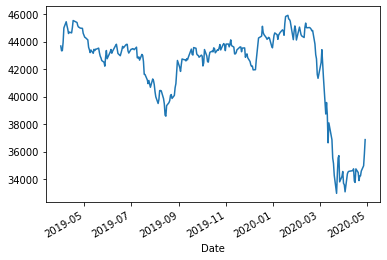

In [5]:
%matplotlib inline
ipc.Close.plot()

# Oscilador Estocastico

In [6]:
def STOK(df):
    SOk = pd.Series((df['Close']-df['Low'])/(df['High']-df['Low']), name = 'SOk')
    df = df.join(SOk)
    return df

In [7]:
df = STOK(ipc)

In [8]:
df = df[['Close', 'SOk']]

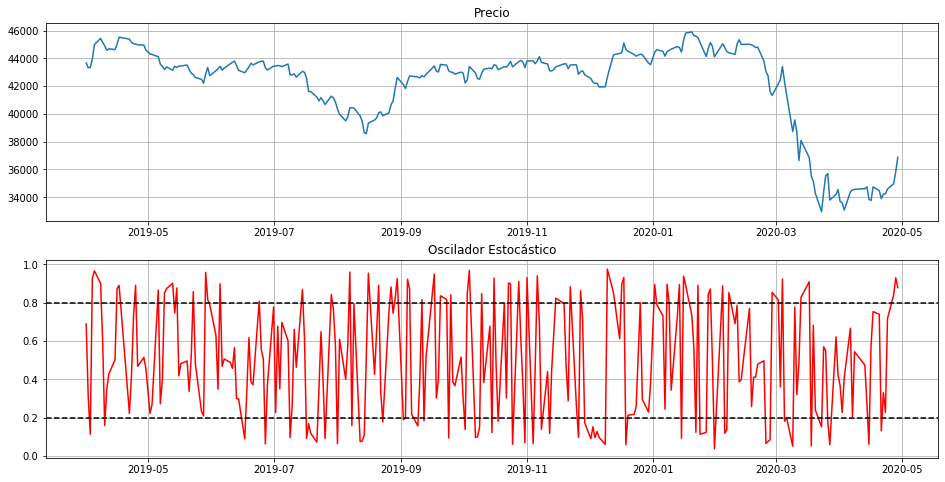

In [9]:
fig = plt.figure(figsize = (16,8))
ax1 = plt.subplot(211)
plt.plot(df.Close)
plt.grid(True)
plt.title('Precio')
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(df.SOk, color = 'r')
plt.axhline(y=0.8, color = 'k', linestyle = '--')
plt.axhline(y=0.2, color = 'k', linestyle = '--')
plt.title('Oscilador Estocástico')
plt.grid(True)
plt.show()

In [10]:
def STO(df, nK, nD, nS=1):
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min())/(df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SOk'+str(nK) )
    SOd = pd.Series(SOk.ewm(ignore_na = False, span = nD, min_periods = nD -1, adjust = True).mean(), name = 'SOd'+str(nD))
    SOk = SOk.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    SOd = SOd.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    df = df.join(SOk)
    df = df.join(SOd)
    df['Recomendacion'] = 0
    df.loc[(((SOk < SOd) & (SOk.shift(1) > SOd.shift(1))) & (SOd > 0.8)),'Recomendacion'] = 'Vender'
    df.loc[(((SOk > SOd) & (SOk.shift(1) < SOd.shift(1))) & (SOd < 0.2)),'Recomendacion'] = 'Comprar'
    df.loc[ df['Recomendacion'] == 0, 'Recomendacion'] = '-'

    return df

In [11]:
df2 = STO(ipc, 14, 3)
df2

,High,Low,Open,Close,Volume,Adj Close,SOk14,SOd3,Recomendacion
Date,,,,,,,,,
2019-04-01,43838.191406,43302.449219,43302.449219,43672.058594,130210300,43672.058594,NaN,NaN,-
2019-04-02,43672.058594,43168.058594,43672.058594,43324.589844,115672300,43324.589844,NaN,NaN,-
2019-04-03,43658.960938,43298.199219,43391.929688,43339.750000,139044600,43339.750000,NaN,NaN,-
2019-04-04,43990.179688,43252.281250,43341.191406,43937.390625,130329800,43937.390625,NaN,NaN,-
2019-04-05,45023.539062,44007.730469,44007.730469,44989.859375,217740400,44989.859375,NaN,NaN,-
2019-04-08,45513.898438,44725.218750,44970.179688,45436.281250,162478900,45436.281250,NaN,NaN,-
2019-04-09,45346.828125,44854.531250,45346.828125,45151.628906,191575000,45151.628906,NaN,NaN,-
2019-04-10,45219.410156,44850.109375,45204.750000,44909.140625,145314900,44909.140625,NaN,NaN,-
2019-04-11,44966.500000,44373.488281,44872.531250,44580.058594,109090000,44580.058594,NaN,NaN,-


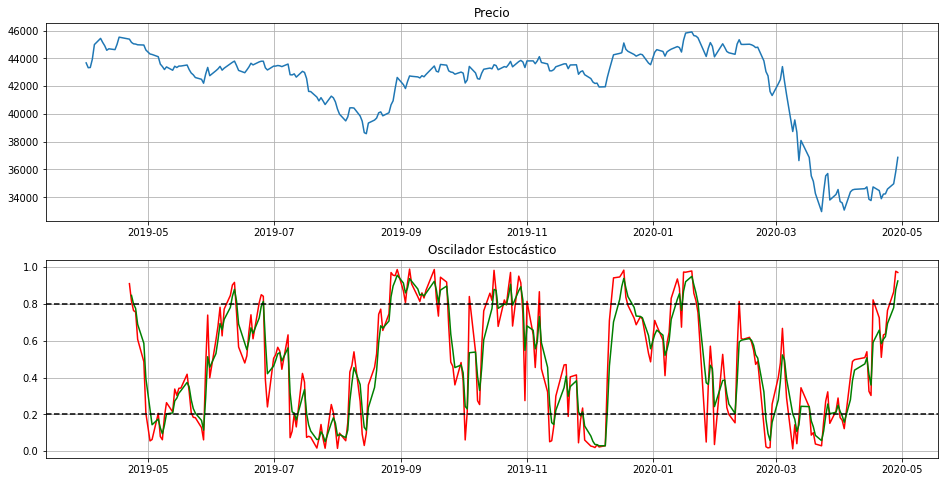

In [12]:
fig = plt.figure(figsize = (16,8))
ax1 = plt.subplot(211)
plt.plot(df2.Close)
plt.grid(True)
plt.title('Precio')
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(df2.SOk14, color = 'r')
plt.plot(df2.SOd3, color = 'g')
plt.axhline(y=0.8, color = 'k', linestyle = '--')
plt.axhline(y=0.2, color = 'k', linestyle = '--')
plt.title('Oscilador Estocástico')
plt.grid(True)
plt.show()

In [13]:
def STOs(df, nK, nD, nS=1):
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min())/(df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SOk'+str(nK) )
    SOd = pd.Series(SOk.rolling(window = nD, center = False).mean(), name = 'SOd'+str(nD))
    SOk = SOk.rolling(window = nS, center = False).mean()
    SOd = SOd.rolling(window = nS, center = False).mean()
    df = df.join(SOk)
    df = df.join(SOd)
    df['Recomendacion'] = 0
    df.loc[((SOk < SOd) & (SOk.shift(1) > SOd.shift(1))) & (SOd > 0.80),'Recomendacion'] = 'Vender'
    df.loc[((SOk > SOd) & (SOk.shift(1) < SOd.shift(1))) & (SOd < 0.20),'Recomendacion'] = 'Comprar'
    df.loc[ df['Recomendacion']== 0, 'Recomendacion'] = '-'
    return df

In [14]:
df3 = STOs(ipc, 14, 3)
df3

,High,Low,Open,Close,Volume,Adj Close,SOk14,SOd3,Recomendacion
Date,,,,,,,,,
2019-04-01,43838.191406,43302.449219,43302.449219,43672.058594,130210300,43672.058594,NaN,NaN,-
2019-04-02,43672.058594,43168.058594,43672.058594,43324.589844,115672300,43324.589844,NaN,NaN,-
2019-04-03,43658.960938,43298.199219,43391.929688,43339.750000,139044600,43339.750000,NaN,NaN,-
2019-04-04,43990.179688,43252.281250,43341.191406,43937.390625,130329800,43937.390625,NaN,NaN,-
2019-04-05,45023.539062,44007.730469,44007.730469,44989.859375,217740400,44989.859375,NaN,NaN,-
2019-04-08,45513.898438,44725.218750,44970.179688,45436.281250,162478900,45436.281250,NaN,NaN,-
2019-04-09,45346.828125,44854.531250,45346.828125,45151.628906,191575000,45151.628906,NaN,NaN,-
2019-04-10,45219.410156,44850.109375,45204.750000,44909.140625,145314900,44909.140625,NaN,NaN,-
2019-04-11,44966.500000,44373.488281,44872.531250,44580.058594,109090000,44580.058594,NaN,NaN,-


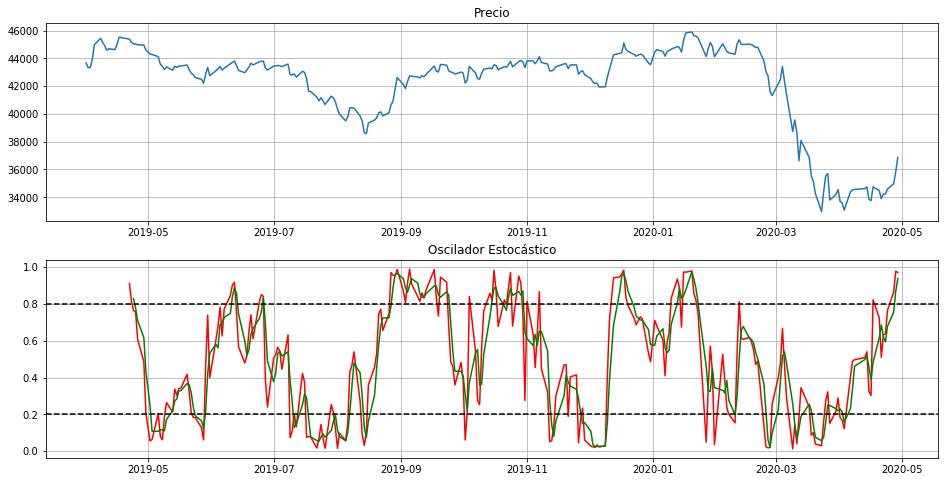

In [15]:
fig = plt.figure(figsize = (16,8))
ax1 = plt.subplot(211)
plt.plot(df3.Close,label=df3.Close)
plt.grid(True)
plt.title('Precio')
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(df3.SOk14,color = 'r')
plt.plot(df3.SOd3,color = 'g')
plt.axhline(y=0.8, color = 'k', linestyle = '--')
plt.axhline(y=0.2, color = 'k', linestyle = '--')
plt.title('Oscilador Estocástico')
plt.grid(True)
plt.show()

In [16]:
df3

,High,Low,Open,Close,Volume,Adj Close,SOk14,SOd3,Recomendacion
Date,,,,,,,,,
2019-04-01,43838.191406,43302.449219,43302.449219,43672.058594,130210300,43672.058594,NaN,NaN,-
2019-04-02,43672.058594,43168.058594,43672.058594,43324.589844,115672300,43324.589844,NaN,NaN,-
2019-04-03,43658.960938,43298.199219,43391.929688,43339.750000,139044600,43339.750000,NaN,NaN,-
2019-04-04,43990.179688,43252.281250,43341.191406,43937.390625,130329800,43937.390625,NaN,NaN,-
2019-04-05,45023.539062,44007.730469,44007.730469,44989.859375,217740400,44989.859375,NaN,NaN,-
2019-04-08,45513.898438,44725.218750,44970.179688,45436.281250,162478900,45436.281250,NaN,NaN,-
2019-04-09,45346.828125,44854.531250,45346.828125,45151.628906,191575000,45151.628906,NaN,NaN,-
2019-04-10,45219.410156,44850.109375,45204.750000,44909.140625,145314900,44909.140625,NaN,NaN,-
2019-04-11,44966.500000,44373.488281,44872.531250,44580.058594,109090000,44580.058594,NaN,NaN,-
